In [ ]:
    import numpy as np
    import pandas as pd
    import pandas_datareader as data
    import matplotlib.pyplot as plt

    start='2010-01-01'
    end='2019-12-31'
    df= data.DataReader('AAPL','yahoo',start,end)
    df.head()

In [51]:
df= df.reset_index()
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.526020
1,2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0,6.537303
2,2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0,6.433319
3,2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0,6.421425
4,2010-01-08,7.571429,7.466429,7.510714,7.570714,447610800.0,6.464118


In [ ]:
df.tail()

In [ ]:
df=df.reset_index()
df.head()

In [54]:
df=df.drop(['Date','Adj Close'],axis=1)
df.head()

,index,High,Low,Open,Close,Volume
0,0,7.660714,7.585000,7.622500,7.643214,493729600.0
1,1,7.699643,7.616071,7.664286,7.656429,601904800.0
2,2,7.686786,7.526786,7.656429,7.534643,552160000.0
3,3,7.571429,7.466071,7.562500,7.520714,477131200.0
4,4,7.571429,7.466429,7.510714,7.570714,447610800.0


In [ ]:
plt.plot(df.Close)

In [ ]:
df

In [57]:
ma100=df.Close.rolling(100).mean()
ma100

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2511    59.401700
2512    59.643125
2513    59.875125
2514    60.106325
2515    60.331875
Name: Close, Length: 2516, dtype: float64

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')

In [ ]:
ma200=df.Close.rolling(200).mean()
ma200

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')
plt.plot(ma200,'g')

In [62]:
df.shape

(2516, 6)

In [63]:
#splitting Data

data_training=pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing=pd.DataFrame(df['Close'][int(len(df)*0.70): int (len(df))])

print(data_training.shape)
print(data_testing.shape)

(1761, 1)
(755, 1)


In [64]:
data_training.head()

,Close
0,7.643214
1,7.656429
2,7.534643
3,7.520714
4,7.570714


In [ ]:
data_testing.head()

In [66]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))

In [ ]:
data_training_array=scaler.fit_transform(data_training)
data_training_array

In [68]:
x_train = []
y_train = []
for i in range(100,data_training_array.shape[0]):
        x_train.append(data_training_array[i-100:i])
        y_train.append(data_training_array[i,0])
x_train,y_train=np.array(x_train),np.array(y_train)


In [69]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
    
model = Sequential()

model.add(LSTM(units = 50,activation = 'relu',return_sequences=True,
               input_shape = (x_train.shape[1],1)))

model.add(Dropout(0.2))


model.add(LSTM(units = 60,activation = 'relu',return_sequences=True))

model.add(Dropout(0.3))


model.add(LSTM(units = 80,activation = 'relu',return_sequences=True))

model.add(Dropout(0.4))

model = Sequential()
model.add(LSTM(units = 120,activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))



In [70]:
model.compile(optimizer = 'adam',loss = 'mean_squared_error')

model.fit(x_train,y_train, epochs = 10, batch_size = 32)

52/52 [==============================] - 6s 119ms/step - loss: 0.0082


In [72]:
model.save('keras_model.h5')

In [ ]:
data_testing.head()

In [ ]:
data_training.tail(100)

In [76]:
past_100_days=data_training.tail(100)

In [77]:
final_df=past_100_days.append(data_testing,ignore_index=True)

In [ ]:
final_df.head()

In [ ]:
input_data=scaler.fit_transform(final_df)
input_data

In [80]:
input_data.shape

(855, 1)

In [95]:
x_test = []
y_test = []
for i in range(100,input_data.shape[0]):
        x_test.append(input_data[i-100:i])
        y_test.append(input_data[i,0])
    

In [96]:
x_test,y_test = np.array(x_test),np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(755, 100, 1)
(755,)


In [ ]:
y_predicted = model.predict(x_test)

y_predicted.shape

In [ ]:
y_predicted

In [99]:
scaler.scale_

array([0.02099517])

In [100]:
scale_factor=1/0.02099517

y_predicted=y_predicted  * scale_factor
y_test=y_test * scale_factor

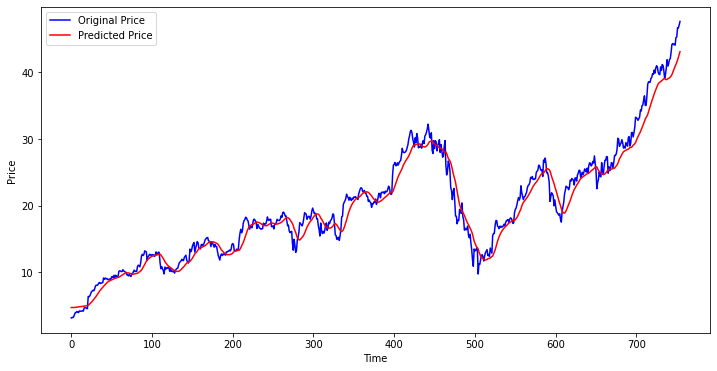

In [101]:
plt.figure(figsize=(12,6))
plt.plot(y_test,'b',label='Original Price')
plt.plot(y_predicted,'r', label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()